# <b> Chapter 5

In [177]:
from time import perf_counter
from collections import Counter
from numbers import Number
from typing import List
import statistics
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

random.seed(4)

In [178]:
def time_it(times=100):
    def outer(fn):
        def inner(*args, **kwargs):
            start = perf_counter()
            for _ in range(times):
                res = fn(*args, **kwargs)
            return res, f"Time elapsed: {(perf_counter() - start)/times}"
        return inner
    return outer

## Describing a Single Set of Data

In [179]:
# List of people with random number of friends

sample_size = 500
num_friends = np.array([random.randint(0, 20) for _ in range(sample_size)], dtype=np.int32)

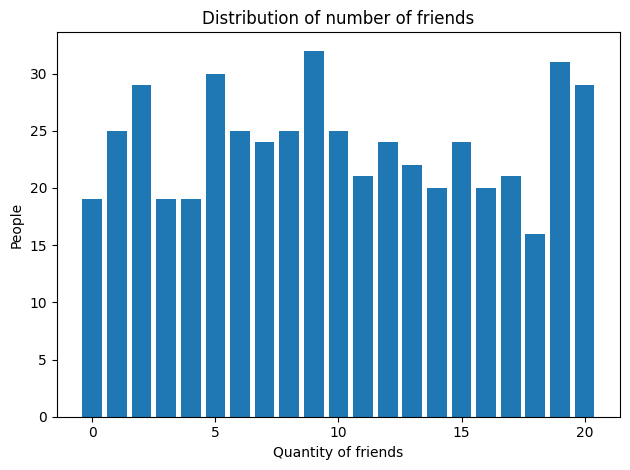

In [180]:
dist = Counter(num_friends)

fig, ax = plt.subplots(tight_layout=True)
ax.bar(dist.keys(), dist.values())
ax.set_ylabel('People')
ax.set_xlabel('Quantity of friends')
plt.title("Distribution of number of friends")
plt.show()

## Central Tendencies

In [181]:
# Defining basic statistics


def _is_list(fn) -> TypeError | None:
    def inner(l, *args, **kwargs):
        """Checks if l is a list"""
        if all(list(map(lambda x: isinstance(x, Number), l))):
            return fn(l, *args, **kwargs)
        raise TypeError("Argument is not of type List.")
    return inner


@_is_list
def mean(l: List[Number]) -> Number:
    """Calculates the mean of a l"""
    return sum(l) / len(l)


@_is_list
def median(l: List[Number]) -> Number:
    """Calculates the median of a l"""
    l = sorted(l)
    def l_median(a, b): return (a + b) / 2
    if len(l) % 2 == 0:
        return l_median(l[int(len(l)/2)-1], l[(int(len(l)/2))])
    return l[int(len(l)/2)]


@_is_list
def quantile(l: List[Number], p: float) -> List[Number]:
    """Calculates the 'pth' percentile (decimal) value in l."""
    return sorted(l)[int(p * len(l))]


@time_it(500_000)
@_is_list
def mode(l: List[Number]) -> List[Number]:
    """Finds which are the most frequent terms from l"""
    c = Counter(l)
    elems = sorted(c.items(), key=lambda x: x[:][1], reverse=True)
    MAX = max(c.values())
    res = []
    for i in elems:
        if (i[1] == MAX):
            res.append(i[0])
        else:
            break
    return res

## Dispersion

In [200]:
# Defining more statistics

@_is_list
def data_range(l: List[Number]) -> Number:
    """Calculates the range of l"""
    return max(l) - min(l)


@_is_list
def dev_mean(l: List[Number]) -> List[Number]:
    """Calculates the deviation from the mean"""
    m = mean(l)
    return list(map(lambda x: x - m, l))


def variance(l: List[Number]) -> Number:
    """Calculates the variance of l"""
    assert len(l) >= 2, "Variance requires at least two elements in l"
    return sum(list(map(lambda x: x ** 2, dev_mean(l))))/(len(l) - 1)


def std_dev(l: List[Number]) -> Number:
    """Calculates the standard deviation of l"""
    return math.sqrt(variance(l))

def iqr(l: List[Number]) -> Number:
    """Calculates the interquartile range of l"""
    return quantile(l, 0.75) - quantile(l, 0.25)

def z_score(l: List[Number]) -> Number:
    """Calculates the z-score of l"""
    std = std_dev(l)
    med = median(l)
    return list(map(lambda x: (x - med)/std, l))

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

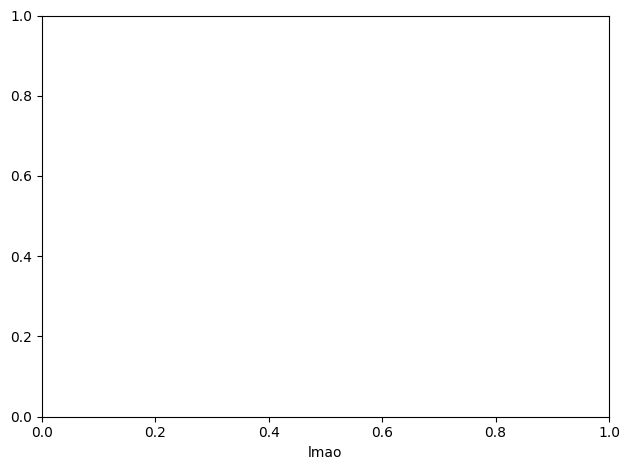

In [209]:
# Calculating the quantile of the ref. dataset and plotting a Q-Q-Plot graph


# fig, ax = plt.subplots(tight_layout=True)
# ax.set_xlabel('lmao')
# ax.plot(z_score(num_friends), ,'ro')
# fig.set_size_inches((10, 6))
# plt.show()